## Introducing Deep Learning

This notebook will demonstrate how to whip up simple shallow and deep neural networks in both Keras and PyTorch, and how it fits into our larger machine learning pipelines.

### imports and data

For our examples, we will be using toy, generated data. This helps us in being more precise with what our models are doing. A common machine learning paradigm is classification, where we are given labelled data: an input, and an output class. We will be making such a classification dataset using scikit-learns make dataset functionality.

In [1]:
import sklearn.datasets
import sklearn.model_selection

In [2]:
X, y = sklearn.datasets.make_classification(n_samples=200, n_features=20, n_classes=2)

In [3]:
X[0]

array([-1.02424983,  0.26770707,  1.82769047,  0.20812076,  0.21274496,
        0.21935724,  1.27816216,  0.19097104,  0.48762889, -0.28863656,
       -0.86093041, -2.36629085,  0.56038649, -0.28430445,  3.28715342,
       -1.51376286, -1.63337179, -1.00193996,  1.22817999,  0.32353253])

In [4]:
y[0]

1

In [6]:
import matplotlib.pyplot as plt

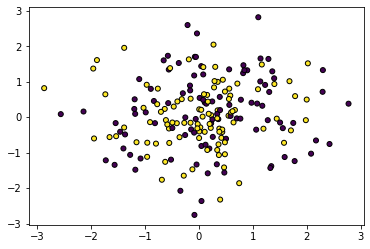

In [7]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')

Here, we generated a dataset of size 100, with 20 fearures, based on a Gaussian process where there are two 'classes'.
Our machine learning algorithm is performing well if it can correctly identify if an input belongs to the class it is labelled as.

For our models to train, it needs to be split into a training and testing dataset.

In [8]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y)

Let us train a simple model and see how well it does on this task. Logistic regression is a popular task for classification.

In [9]:
import sklearn.linear_model

In [10]:
logreg = sklearn.linear_model.LogisticRegression()

In [11]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
logreg.predict(X_test)

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0])

In [13]:
sklearn.metrics.accuracy_score(y_test, logreg.predict(X_test))

0.76

Not bad - 86% accuracy. Now that we have a basic ML pipeline, let's make this deep!

### Single layer net in Keras

In [14]:
## Keras
import keras
import tensorflow as tf
import numpy as np

Keras makes creating deep learning models really easy. Here is one with only one hidden layer with 20 units, taking an input with 20 features. It uses relu activation for the first layer, and then a sigmoid for the last layer to make its prediction. The loss is binary cross entropy which is commonly used for prediction problems, and the ADAM optimiser.

In [15]:
model = keras.models.Sequential([keras.layers.Dense(20, input_dim=20, activation='relu'),
                                 keras.layers.Dense(1, activation='sigmoid')])

In [16]:
model.compile(loss="binary_crossentropy", optimizer="adam")

In [17]:
history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
5/5 [==============================] - 3s 3ms/step - loss: 0.8159
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7855
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7655
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7501
Epoch 5/200
5/5 [==============================] - 0s 2ms/step - loss: 0.7130
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6840
Epoch 7/200
5/5 [==============================] - 0s 3ms/step - loss: 0.6576
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6726
Epoch 9/200
5/5 [==============================] - 0s 3ms/step - loss: 0.6438
Epoch 10/200
5/5 [==============================] - 0s 6ms/step - loss: 0.6366
Epoch 11/200
5/5 [==============================] - 0s 2ms/step - loss: 0.5933
Epoch 12/200
5/5 [==============================] - 0s 2ms/step - loss: 0.5800
Epoch 13/200
5/5 [==============================] - 0s 2ms/st

In [18]:
sklearn.metrics.accuracy_score(y_test, model.predict_classes(X_test))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.78

Neat - our single layer network performs as well as logistic regression for this toy dataset. 
Let us now build the same in PyTorch!

### Single Layer Net in PyTorch

PyTorch is a little more involved than Keras. We need to initialise our network with the various parts we will be using. We are using the same parameters as the Keras example. We then define what a forward pass looks like, which is kind of similar to the way we stacked networks in Keras.

In [19]:
## Pytorch
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim

In [20]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(20, 20)
        # Output layer, 2 units - one for each digit
        self.output = nn.Linear(20, 1)
        
        # Define sigmoid activation and softmax output 
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x

In [21]:
net = Network()
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.BCELoss()

In [22]:
X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.reshape(torch.tensor(y_train), (150, 1))

Unlike Keras where we hit fit fit and the training happens, we have to define a training epoch, where we set our gradients to zero, run the test data, do a backward pass, and then update the weights. This is actually how a neural network trains, so its useful to see it broken down like this.

In [23]:
def train_epoch(model, opt, criterion, X_train, y_train):
    model.train()
    losses = []
    opt.zero_grad()
    # (1) Forward
    y_hat = model(X_train)
    # (2) Compute diff
    loss = criterion(y_hat, y_train)
    # (3) Compute gradients
    loss.backward()
    # (4) update weights
    opt.step()        
    losses.append(loss.data.numpy())
    return losses

In [24]:
import matplotlib.pyplot as plt

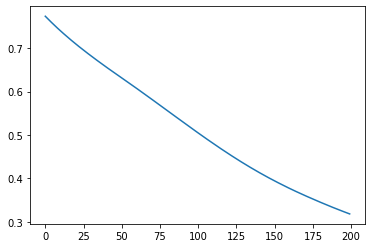

In [25]:
e_losses = []
num_epochs = 200
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion, X_train_tensor.float(), y_train_tensor.float())
plt.plot(e_losses)

That little loss plot is useful for us to see how our model improves with each epoch. We did 200 epochs like the Keras example. Unlike scikit-learn or Keras objects, we don't have a predict method, but instead pass the test data directly to the net. The little function below that converts the results into a way which we can feed into a metric function.

In [26]:
output = net(torch.tensor(X_test).float())

In [27]:
def to_label(tensor):
    labels = []
    for val in tensor:
        if val > 0.5:
            labels.append(1)
        else:
            labels.append(0)
    return labels

In [28]:
y_pred = to_label(output)

In [29]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.64

Cool! So simple single layer neural networks in both Keras and PyTorch function more or less the same, not beating logistic regression by much. Let us now make our networks deep, and see if that helps!

### Keras Deep Net

Making a neural net deeper simply means adding more layers or complexity. Lets add an extra layer and increase the number of units and see how it does!

In [30]:
model = keras.models.Sequential([keras.layers.Dense(20, input_dim=20, activation='relu'),
                                 keras.layers.Dense(20, activation='relu'),
                                 keras.layers.Dense(1, activation='sigmoid')])

In [31]:
model.compile(loss="binary_crossentropy", optimizer="adam")

In [32]:
history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 3ms/step - loss: 0.6704
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6510
Epoch 3/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6256
Epoch 4/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6104
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 0.5824
Epoch 6/200
5/5 [==============================] - 0s 4ms/step - loss: 0.5841
Epoch 7/200
5/5 [==============================] - 0s 2ms/step - loss: 0.5610
Epoch 8/200
5/5 [==============================] - 0s 2ms/step - loss: 0.5427
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 0.5071
Epoch 10/200
5/5 [==============================] - 0s 3ms/step - loss: 0.5199
Epoch 11/200
5/5 [==============================] - 0s 3ms/step - loss: 0.4831
Epoch 12/200
5/5 [==============================] - 0s 2ms/step - loss: 0.4841
Epoch 13/200
5/5 [==============================] - 0s 3ms/st

In [33]:
sklearn.metrics.accuracy_score(y_test, model.predict_classes(X_test))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.72

### PyTorch deep net

In [34]:
class DeepNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(20, 20)

        # Output layer
        self.output = nn.Linear(20, 1)
        
        # Define sigmoid activation and softmax output 
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.relu(x)
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x

In [35]:
net = DeepNetwork()
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.BCELoss()

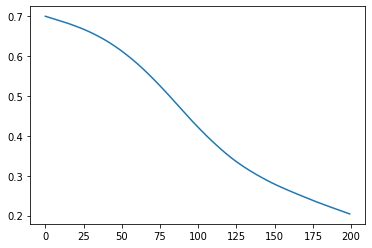

In [36]:
e_losses = []
num_epochs = 200
for e in range(num_epochs):
    e_losses += train_epoch(net, opt, criterion, X_train_tensor.float(), y_train_tensor.float())
plt.plot(e_losses)

In [37]:
output = net(torch.tensor(X_test).float())

In [38]:
y_pred = to_label(output)

In [39]:
sklearn.metrics.accuracy_score(y_test, y_pred)

0.68

Adding just one layer improved model accuracies for both our Keras and PyTorch implementations!
Adding depth adds non-linearity and is able to capture more complex relations. Keras and PyTorch have different set ups and formats, and you would want to switch things around as you see fit.

several thoughts 

1.   the metric_learn package has not been installed automatically on colab. It can be done so by simple  pip install, but we may want to teach students these basic things at the start. (like import, pip etc.)
2. google drive to colab code (to load things from drive)
from google.colab import drive
drive.mount('/content/drive')
3. some tensor calculation code can be used; add it below.
4. I think maybe we can still lead students through the process of constructing a network (like forward propagation, backward propagation etc.) just use the texts from the other notebooks. 

In [48]:
#pytorch tensors calculation
x = torch.empty(5, 3)
print(x)
x = torch.rand(5, 3)
print(x)
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[ 1.8771e-06,  3.0722e-41,  1.4714e-43],
        [ 1.5414e-43,  1.6255e-43,  5.6052e-44],
        [ 1.6816e-43,  4.4842e-44,  6.0256e-44],
        [ 4.4842e-44,  1.6956e-43,  5.7453e-44],
        [-1.8027e-28,  4.5555e-41,  4.0280e-23]])
tensor([[0.5899, 0.9631, 0.0597],
        [0.1718, 0.0475, 0.8030],
        [0.5162, 0.9508, 0.9091],
        [0.3626, 0.9848, 0.1036],
        [0.1447, 0.4816, 0.0765]])
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [53]:
y = torch.rand(5, 3)
print(x + y)
print(torch.add(x, y))
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)
y.add_(x) # the `_` sign at end means the operation mutates tensor y in-place
print(y)

tensor([[0.7381, 0.0834, 0.3235],
        [0.0525, 0.4385, 0.5365],
        [0.6949, 0.0022, 0.8386],
        [0.8530, 0.4362, 0.3380],
        [0.1412, 0.5857, 0.9713]])
tensor([[0.7381, 0.0834, 0.3235],
        [0.0525, 0.4385, 0.5365],
        [0.6949, 0.0022, 0.8386],
        [0.8530, 0.4362, 0.3380],
        [0.1412, 0.5857, 0.9713]])
tensor([[0.7381, 0.0834, 0.3235],
        [0.0525, 0.4385, 0.5365],
        [0.6949, 0.0022, 0.8386],
        [0.8530, 0.4362, 0.3380],
        [0.1412, 0.5857, 0.9713]])
tensor([[0.7381, 0.0834, 0.3235],
        [0.0525, 0.4385, 0.5365],
        [0.6949, 0.0022, 0.8386],
        [0.8530, 0.4362, 0.3380],
        [0.1412, 0.5857, 0.9713]])


In [54]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [56]:
# to_remove solution
a1 = torch.tensor([[2, 4], [5, 7]])
a2 = torch.tensor([[1, 1], [2, 3]])
a3 = torch.tensor([[10, 10], [12, 1]])
A = torch.add(a1 @ a2, a3)
print("A =", A)

# @ and torch.matmul return a multidimensional tensor
b1 = torch.tensor([[3], [5], [7]])
b2 = torch.tensor([[2], [4], [8]])
b = b1.T @ b2
print("b =", b)

# dot function returns a scalar tensor
b1 = torch.tensor([3, 5, 7])
b2 = torch.tensor([2, 4, 8])
b = torch.dot(b1, b2)
print("b =", b)

A = tensor([[20, 24],
        [31, 27]])
b = tensor([[82]])
b = tensor(82)


In [57]:
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [58]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [59]:
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
